<a href="https://colab.research.google.com/github/mdjahanzaib/Python_Class_Work_jz/blob/master/Deep_Learning_Chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB DataSet Example

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
train_labels[0]

1

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
print(len(x_train[0]))

10000


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='rmsprop',
loss='mse',
metrics=['accuracy'])

# **Validating**

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 197us/sample - loss: 0.4717 - acc: 0.7773 - val_loss: 0.3398 - val_acc: 0.8567
Epoch 2/20
15000/15000 [==============================] - 3s 209us/sample - loss: 0.2493 - acc: 0.9029 - val_loss: 0.2827 - val_acc: 0.8844
Epoch 3/20
15000/15000 [==============================] - 3s 211us/sample - loss: 0.1703 - acc: 0.9390 - val_loss: 0.2826 - val_acc: 0.8866
Epoch 4/20
15000/15000 [==============================] - 3s 208us/sample - loss: 0.1151 - acc: 0.9613 - val_loss: 0.3136 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 3s 178us/sample - loss: 0.0772 - acc: 0.9734 - val_loss: 0.3869 - val_acc: 0.8718
Epoch 6/20
15000/15000 [==============================] - 2s 161us/sample - loss: 0.0618 - acc: 0.9807 - val_loss: 0.3638 - val_acc: 0.8826
Epoch 7/20
15000

In [0]:
history_dict = history.history
history_dict.keys() 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

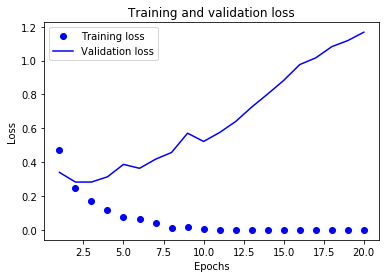

In [0]:
import matplotlib.pyplot as plt
#history_dict = history.history
acc=history_dict['acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

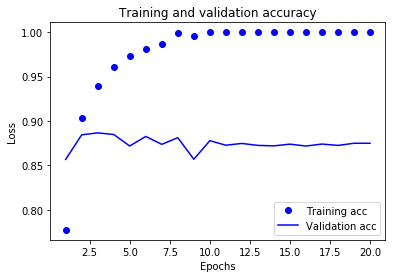

In [0]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)


Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 2s 85us/sample - loss: 0.4494 - acc: 0.8194
Epoch 2/4
25000/25000 [==============================] - 2s 93us/sample - loss: 0.2562 - acc: 0.9134
Epoch 3/4
25000/25000 [==============================] - 2s 83us/sample - loss: 0.1985 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 3s 104us/sample - loss: 0.1665 - acc: 0.9408


In [0]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 78us/sample - loss: 0.2953 - acc: 0.8838


In [0]:
model.predict(x_test)

array([[0.21134019],
       [0.9991262 ],
       [0.807431  ],
       ...,
       [0.09608755],
       [0.0722467 ],
       [0.5835077 ]], dtype=float32)

# Reuters Dataset

In [0]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
len(train_data)

8982

In [0]:
 len(test_data)

2246

In [0]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [0]:
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [0]:
train_labels[10]

3

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 178us/step - loss: 2.6611 - acc: 0.4830 - val_loss: 1.7505 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 135us/step - loss: 1.4291 - acc: 0.7105 - val_loss: 1.2862 - val_acc: 0.7320
Epoch 3/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0523 - acc: 0.7766 - val_loss: 1.1173 - val_acc: 0.7790
Epoch 4/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.8229 - acc: 0.8262 - val_loss: 1.0097 - val_acc: 0.7910
Epoch 5/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.6597 - acc: 0.8618 - val_loss: 0.9590 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.5195 - acc: 0.8929 - val_loss: 0.9169 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.4225 - acc: 0.9139 - val_loss: 0.8871 - val_acc: 0.8200


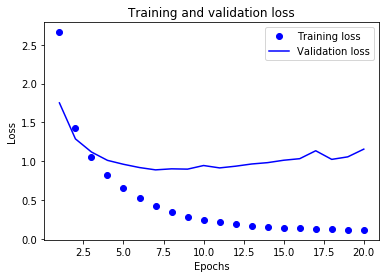

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

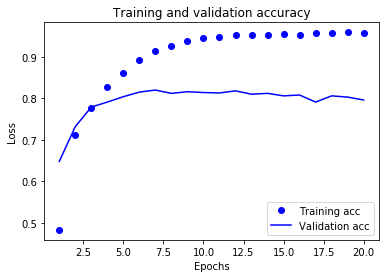

In [0]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 170us/step - loss: 2.5733 - acc: 0.5195 - val_loss: 1.6587 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 135us/step - loss: 1.3454 - acc: 0.7212 - val_loss: 1.2486 - val_acc: 0.7340
Epoch 3/9
7982/7982 [==============================] - 1s 131us/step - loss: 1.0008 - acc: 0.7880 - val_loss: 1.1021 - val_acc: 0.7680
Epoch 4/9
7982/7982 [==============================] - 1s 133us/step - loss: 0.7907 - acc: 0.8344 - val_loss: 1.0045 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 1s 131us/step - loss: 0.6323 - acc: 0.8681 - val_loss: 0.9430 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 131us/step - loss: 0.5071 - acc: 0.8940 - val_loss: 0.9226 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 1s 131us/step - loss: 0.4141 - acc: 0.9129 - val_loss: 0.8951 - val_acc: 0.8140
Epoch 8

In [0]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 122us/step


In [0]:
results

[0.9999918141539141, 0.7831700801424755]

In [0]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18165627782724844

In [0]:
predictions = model.predict(x_test)